In [10]:
import odl
import matplotlib.pyplot as plt
import numpy as np

from fbrct import *

In [11]:
fname = '/export/scratch1/adriaan/MatlabProjects/DynamicTomography/astra_scripts' \
    f'/fluidized_bed_1_python_2.mat'
p, pref, (T, nr_detectors, det_height, det_count) = load_dataset(fname)

recon_height_range = range(774 - 350, 774 + 350)
recon_height_length = int(len(recon_height_range))
recon_start_timeframe = 22
recon_end_timeframe = T
n = 50  # reconstruction on a n*n*m grid
L = 10  # -L cm to L cm in the physical space
# scale amount of pixels and physical height according to the selected reconstruction range
m = max(int(np.floor(n / DETECTOR_ROWS * recon_height_length)), 1)
H = L * m / n  # physical height

In [12]:
apart = uniform_angle_partition()
dpart = detector_partition_3d(recon_height_length)
geometry = odl.tomo.ConeFlatGeometry(apart, dpart, SOURCE_RADIUS, DETECTOR_RADIUS)
reco_space_3d = odl.uniform_discr(
    min_pt=[-L, -L, -H],
    max_pt=[L, L, H],
    shape=[n, n, m])
xray_transform = odl.tomo.RayTransform(reco_space_3d, geometry)

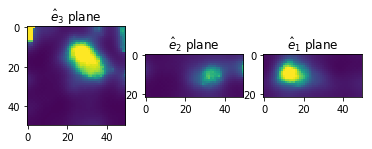

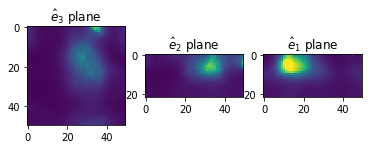

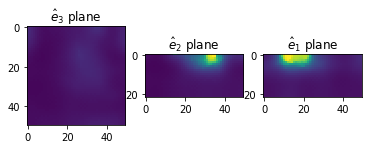

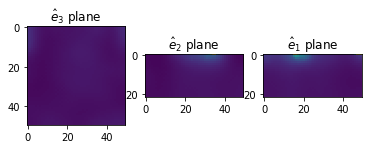

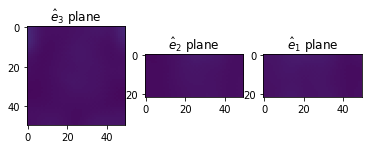

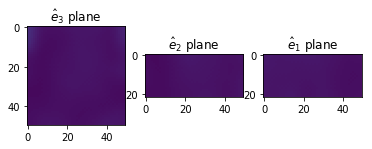

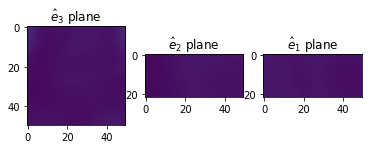

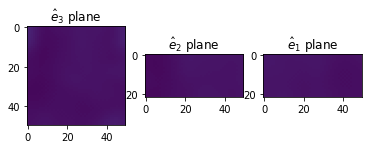

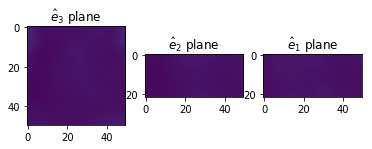

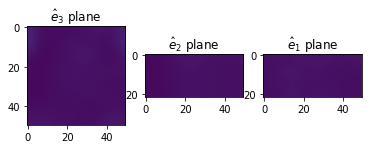

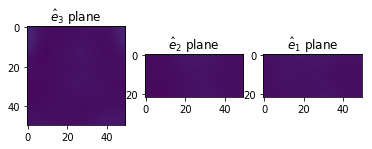

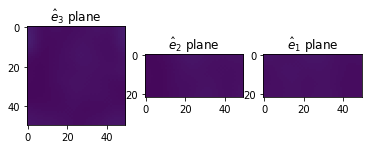

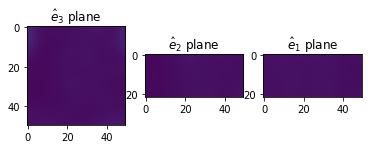

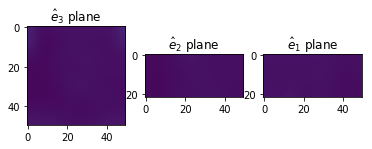

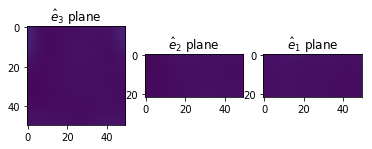

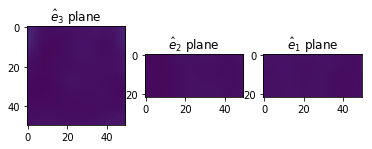

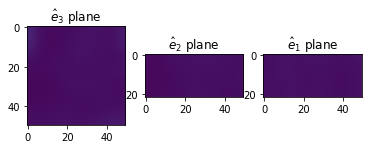

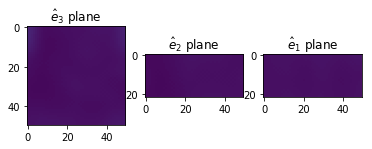

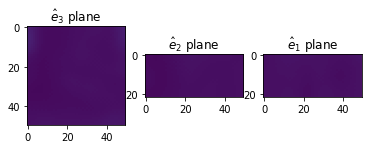

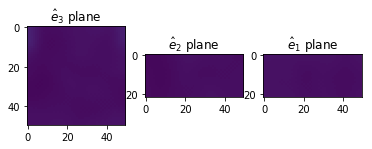

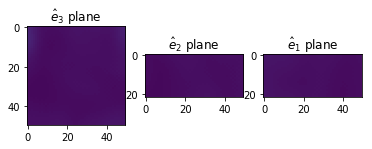

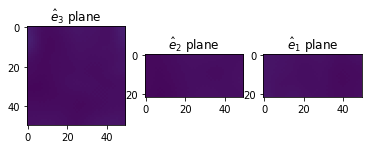

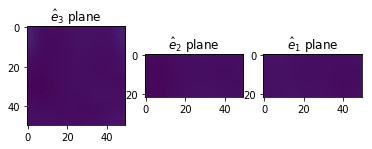

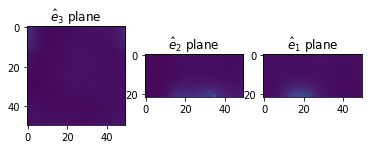

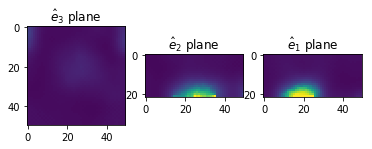

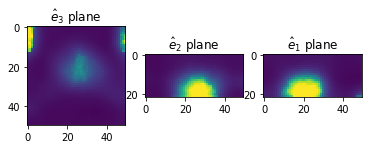

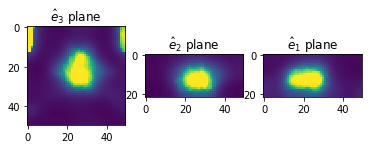

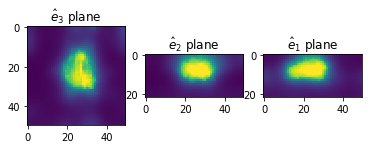

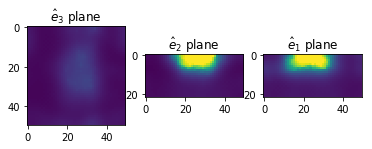

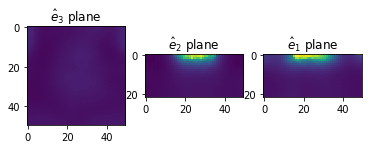

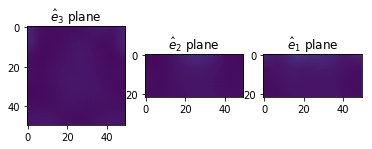

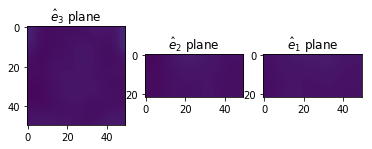

KeyboardInterrupt: 

In [14]:
for t in range(recon_start_timeframe, recon_end_timeframe):
    # sinogram selection and scaling
    pr = -(p[t, :, recon_height_range, :] - pref[:, recon_height_range, :])
    sinogram = np.swapaxes(pr, 1, 2)  # plot_sino(sinogram)

    # reconstruct
    x = xray_transform.domain.element(np.zeros(xray_transform.domain.shape))
    reconstruct_filter(
        xray_transform,
        sinogram,
        x,
        niter=50,
        clip=[0, None])

    # postprocess and plot
    from skimage.restoration import denoise_tv_chambolle
    y = denoise_tv_chambolle(x.data, weight=0.036)
    plot_3d(y, vmax=0.05)